#Text Classification Using Neural Network Model

## Kelompok 4

1. Siti Nurrahmasita (2108107010015)
2. Dhaifina Alifa Putri (2108107010018)
3. Rahmatul Idami (2108107010071)
4. Faiza Sabila (2108107010083)
5. Hadija Humaira (2108107010084)

##*Import Libraries*

In [9]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


##*Load Data from CSV*


In [10]:
# Load data from CSV
df = pd.read_csv('Emotion_classify_Data.csv')
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


##*Preprocessing*


**Pengecekan Tipe Data**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


**Pengecekan diplikat**

In [12]:
df.duplicated().sum()

0

**Pengecekan nilai hilang**

In [13]:
df.isna().sum()

Comment    0
Emotion    0
dtype: int64

**Pengecekan distribusi data disetiap label**

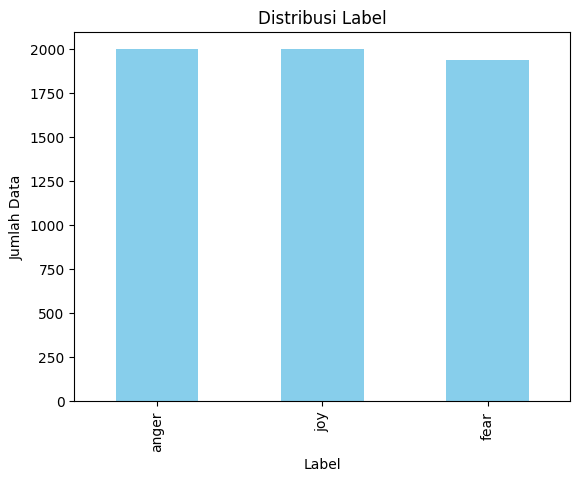

In [14]:
# Menghitung distribusi label
label_counts = df['Emotion'].value_counts()

# Menampilkan distribusi label dalam bentuk grafik
label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.show()

**Tokenisasi teks**

In [15]:
# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Comment'])
X = tokenizer.texts_to_sequences(df['Comment'])
X = pad_sequences(X)

**Mengonversi label**

In [16]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Emotion'])

##*Membangun Model*

In [17]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(tokenizer.word_index) + 1, 128),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback to stop training when there is no improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))


Epoch 1/50
149/149 [==============================] - 4s 23ms/step - loss: 1.2082 - accuracy: 0.3405 - val_loss: 1.1106 - val_accuracy: 0.3493
Epoch 2/50
149/149 [==============================] - 3s 22ms/step - loss: 1.1278 - accuracy: 0.3487 - val_loss: 1.0861 - val_accuracy: 0.4301
Epoch 3/50
149/149 [==============================] - 5s 32ms/step - loss: 1.0730 - accuracy: 0.4323 - val_loss: 1.0310 - val_accuracy: 0.5505
Epoch 4/50
149/149 [==============================] - 3s 21ms/step - loss: 0.9185 - accuracy: 0.6313 - val_loss: 0.8117 - val_accuracy: 0.7988
Epoch 5/50
149/149 [==============================] - 3s 21ms/step - loss: 0.6017 - accuracy: 0.8311 - val_loss: 0.5201 - val_accuracy: 0.8872
Epoch 6/50
149/149 [==============================] - 3s 20ms/step - loss: 0.3297 - accuracy: 0.9324 - val_loss: 0.3541 - val_accuracy: 0.9040
Epoch 7/50
149/149 [==============================] - 5s 32ms/step - loss: 0.1896 - accuracy: 0.9657 - val_loss: 0.2665 - val_accuracy: 0.9226

##*Menyimpan tokenisasi dan konversi label*


In [18]:
import pickle

# Save the tokenizer
tokenizer_path = 'tokenizer.h5'
with open(tokenizer_path, 'wb') as file:
    pickle.dump(tokenizer, file)

# Save the label encoder
label_encoder_path = 'label_encoder.h5'
with open(label_encoder_path, 'wb') as file:
    pickle.dump(label_encoder, file)


##*Menyimpan model*

In [19]:
# Menyimpan model ke dalam file .h5
model.save('text_classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


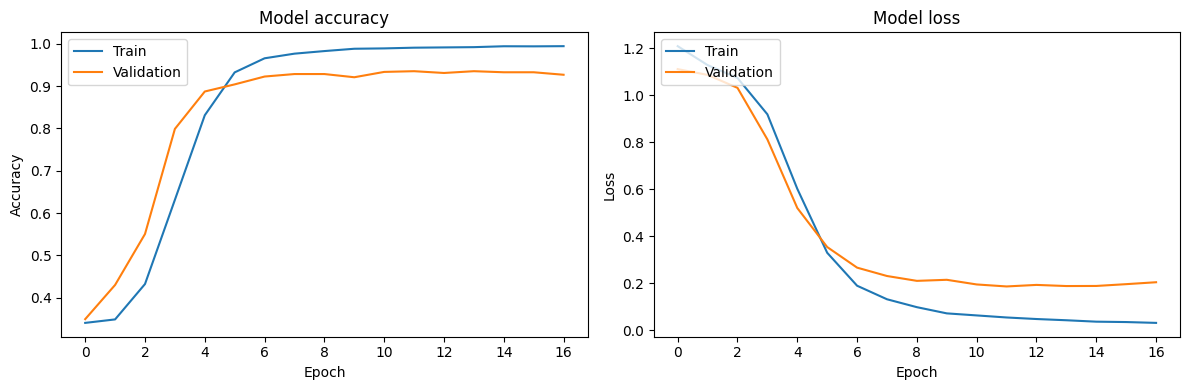

In [20]:
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


38/38 [==============================] - 0s 3ms/step


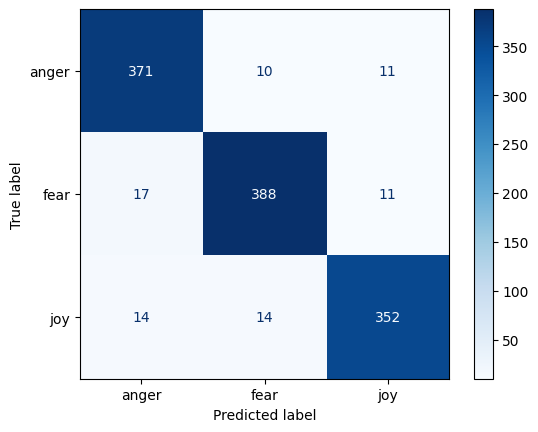

In [21]:
# Memprediksi label pada set uji
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Menampilkan confusion matrix dengan ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [22]:
# Memprediksi label pada set uji
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Mencetak laporan klasifikasi
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print(report)


38/38 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

       anger       0.92      0.95      0.93       392
        fear       0.94      0.93      0.94       416
         joy       0.94      0.93      0.93       380

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188



In [23]:
# Contoh data baru
new_data = [
    'I sat down on the bench and saw them looking at me, all looking suspicious',
    'I get a car from my mom for my birthday',
    'I feel jealous because i got b in my math test'

]

# Tokenisasi dan padding data baru
new_sequences = tokenizer.texts_to_sequences(new_data)
new_padded = pad_sequences(new_sequences, maxlen=X.shape[1])

# Prediksi emosi
predictions = model.predict(new_padded)

# Decode label prediksi
predicted_labels = label_encoder.inverse_transform([tf.argmax(prediction).numpy() for prediction in predictions])

# Tampilkan hasil prediksi
for text, label in zip(new_data, predicted_labels):
    print(f"Text: {text} -> Predicted Emotion: {label}")


1/1 [==============================] - 0s 26ms/step
Text: I sat down on the bench and saw them looking at me, all looking suspicious -> Predicted Emotion: fear
Text: I get a car from my mom for my birthday -> Predicted Emotion: joy
Text: I feel jealous because i got b in my math test -> Predicted Emotion: anger
